<a href="https://colab.research.google.com/github/THEABHASHARMA/EDAHypothesisTesting/blob/main/campaign_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA and Hypothesis Testing on Campaign Dataset

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("campaign - campaign.csv")

#1. Data Preprocessing

a) Summary Statistics:

In [55]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [56]:
df.shape

(2239, 27)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [58]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
df[num_cols].describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,...,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379
std,3246.372471,11.985494,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,...,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


b) Data Cleaning

In [60]:
df['Income'] = df['Income'].str.replace('$','').str.replace(',','')
df['Income'] = df['Income'].astype(float)

c) Missing Value Analysis:

In [61]:
# Calculate the mean of the Income column
average_income = df['Income'].mean()

# Fill the null values with the calculated average
df['Income'].fillna(average_income, inplace=True)

#2. Feature Engineering

a) Create Age using 'Year_Birth'

In [62]:
#feature engineering
df['Age']=2021-df['Year_Birth']

b) Spending vs. Income (Correlation)

In [63]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [64]:

#Pearson correlation test
correlation, p_value = stats.pearsonr(df['Income'], df['Spending'])
print(correlation, p_value)

# Spearman correlation test (if data is non-linear or non-normal)
spearman_corr, spearman_p_value = stats.spearmanr(df['Income'], df['Spending'])
print(spearman_corr, spearman_p_value)

0.7892411286270017 0.0
0.8488093650788217 0.0


Pearson correlation:A high positive value (close to 1) indicates a strong positive linear relationship, meaning as Income increases, Spending also tends to increase.

Spearman correlation: A high positive value (close to 1) indicates a strong positive monotonic relationship, meaning as Income increases, Spending also tends to increase, though not necessarily in a linear fashion.

c) Marital Status Reclassification

In [65]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [66]:
#categorising the marital status as either couple or alone
df['Marital_Situation']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})


d) Create 'Has_child' feature

In [67]:
df['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

In [68]:
df[['Income','Spending','Age']].describe()

,Income,Spending,Age
count,2239.000000,2239.000000,2239.000000
mean,51969.861400,606.041090,52.197856
std,21410.586353,602.274089,11.985494
min,1730.000000,5.000000,25.000000
25%,35533.500000,69.000000,44.000000
50%,51717.000000,396.000000,51.000000
75%,68277.500000,1046.000000,62.000000
max,162397.000000,2525.000000,128.000000


In [69]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Spending,Marital_Situation,Has_child
1976,1491,1965,2n Cycle,Together,71488.0000,0,0,2/18/13,87,162,...,0,0,0,0,0,CA,56,559,In couple,No
1966,5798,1973,Master,Together,51969.8614,0,0,11/23/13,87,445,...,0,0,0,0,0,GER,48,985,In couple,No
75,9999,1965,Graduation,Together,75276.0000,0,0,9/27/12,2,610,...,0,0,0,0,0,SP,56,1040,In couple,No
1748,10992,1967,Graduation,Together,75702.0000,1,1,8/29/12,77,650,...,0,0,0,0,0,SA,54,1148,In couple,Yes
1722,7301,1982,2n Cycle,Single,23616.0000,1,0,11/17/12,76,4,...,0,0,0,0,0,SP,39,79,Alone,Yes
1803,7281,1959,PhD,Single,51969.8614,0,0,11/5/13,80,81,...,0,0,0,0,0,AUS,62,186,Alone,No
765,2724,1981,Master,Single,36143.0000,1,0,3/30/14,33,12,...,0,0,0,0,0,SP,40,19,Alone,Yes
1288,3033,1963,Master,Together,38620.0000,0,0,5/11/13,56,112,...,0,0,0,0,0,AUS,58,318,In couple,No
19,2795,1958,Master,Single,30523.0000,2,1,7/1/13,0,5,...,0,0,0,0,0,CA,63,13,Alone,Yes
504,6466,1965,PhD,Married,57236.0000,1,1,3/12/14,22,105,...,0,0,0,0,0,SP,56,121,In couple,Yes


In [70]:
#expand the output display to see more columns of a Pandas DataFrame
pd.set_option('display.max_columns', None)

In [71]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Spending,Marital_Situation,Has_child
87,4098,1973,Graduation,Married,24639.0,1,1,1/28/14,3,20,3,16,0,4,1,3,2,0,4,6,0,0,0,0,0,0,AUS,48,44,In couple,Yes
1272,6866,1969,Master,Together,35924.0,1,1,3/23/14,56,8,0,14,2,3,7,1,1,0,3,5,0,0,0,0,0,0,SA,52,34,In couple,Yes
1655,1173,1947,Master,Together,77632.0,0,0,3/10/13,73,1200,105,758,0,42,147,1,4,2,6,2,0,1,1,0,0,0,SP,74,2252,In couple,No
1501,1964,1951,Graduation,Together,86610.0,0,0,9/5/13,66,446,107,768,33,196,53,1,5,6,6,2,0,0,0,0,0,0,SP,70,1603,In couple,No
350,9668,1971,Graduation,Married,18793.0,1,0,1/12/13,14,4,16,20,0,17,20,3,2,0,4,8,0,0,0,0,0,0,SA,50,77,In couple,Yes
1608,8629,1956,Graduation,Widow,46984.0,1,1,3/26/13,71,19,1,10,2,1,8,1,1,0,3,5,0,0,0,0,0,0,CA,65,41,Alone,Yes
1165,8977,1985,Basic,Single,16581.0,0,0,1/12/13,51,1,3,4,2,3,11,1,0,0,3,4,0,0,0,0,0,0,SP,36,24,Alone,No
63,3112,1977,Master,Married,22701.0,1,0,9/5/13,2,2,4,9,0,4,5,1,1,0,3,5,0,0,0,0,0,0,SP,44,24,In couple,Yes
948,5303,1974,PhD,Together,79632.0,0,0,4/8/14,42,471,0,510,99,21,12,1,6,4,9,2,0,0,0,0,0,0,SA,47,1113,In couple,No
1630,9167,1956,Graduation,Married,67131.0,0,1,3/26/13,72,465,71,250,93,35,62,3,9,2,12,6,0,0,0,0,0,0,SP,65,976,In couple,Yes


e) Income Brackets Classification

In [72]:
mean_income = df['Income'].mean()
mean_income

51969.86139954853

In [73]:
df['IncomeBracket'] = 'Above Mean'
df.loc[df['Income'] < mean_income, 'IncomeBracket'] = 'Below Mean'

f) Campaign Participation

In [74]:
df['EverAcceptedCampaign'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']] == 1).any(axis=1)

#3. Removing Outliers


In [78]:
df.shape

(2239, 33)

In [77]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers", outlier_count)

Count the number of outliers 7


In [79]:
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
df.shape

(2232, 33)

In [80]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Spending'].quantile(0.25)
Q3 = df['Spending'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Spending'] < lower_bound) | (df['Spending'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers", outlier_count)

Count the number of outliers 3


In [81]:
df = df[(df['Spending'] >= lower_bound) & (df['Spending'] <= upper_bound)]
df.shape

(2229, 33)

#4. Hypothesis Testing

In [22]:
contingency_table = pd.crosstab(df['IncomeBracket'], df['EverAcceptedCampaign'])
print(contingency_table)

EverAcceptedCampaign  False  True 
IncomeBracket                     
Above Mean              770    345
Below Mean             1006    118


This column now contains True if the customer accepted any of the five campaigns and False if they did not accept any. This provides a quick summary of whether a customer has ever accepted a campaign.

#Insights and recommendations:

1. Customers in the "Above Mean" income bracket are more likely to accept campaigns compared to those in the "Below Mean" income bracket.
A significant portion of both income groups have never accepted a campaign, but the disparity in acceptance rates suggests that income level plays a role in campaign effectiveness.


2. Target Higher-Income Customers More Aggressively: Since customers in the "Above Mean" income bracket are more likely to accept campaigns, consider allocating more resources to target this group with personalized and high-value campaigns. This might involve offering premium products or services that align with their higher purchasing power.

3. Conduct further analysis to understand what motivates the few "Below Mean" income customers who do accept campaigns. Use these insights to refine your approach for this segment.

4. Use A/B testing to experiment with different messaging, offers, and channels to determine what resonates best with each group.

Is Income of Customers Dependent on Their Education?

In [82]:
# Null Hypothesis (H0): Income is independent of Education.
# Alternative Hypothesis (H1): Income is dependent on Education

from scipy.stats import f_oneway, kruskal
anova_result = f_oneway(df['Income'][df['Education'] == 'Graduation'],
                        df['Income'][df['Education'] == 'PhD'],
                        df['Income'][df['Education'] == 'Master'],
                        df['Income'][df['Education'] == '2n Cycle'],
                        df['Income'][df['Education'] == 'Basic'])
anova_result

F_onewayResult(statistic=39.66322466812968, pvalue=3.959221463449789e-32)

In [86]:
if anova_result[1] < 0.05:
    print("There is a statistically significant association between income and Education")
    # Further explore the differences in acceptance rates between the two income brackets
else:
    print("There is not enough evidence to conclude that there is an association between income and Educatione.")

There is a statistically significant association between income and Education


People with Higher/Lower Income who are more Attracted Towards Campaigns?

In [23]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square test statistic:', chi2)
print('p-value:', p)


Chi-square test statistic: 141.37659987264502
p-value: 1.3310467690679514e-32


In [24]:
if p < 0.05:
    print("There is a statistically significant association between income bracket and campaign acceptance.")
    # Further explore the differences in acceptance rates between the two income brackets
else:
    print("There is not enough evidence to conclude that there is an association between income bracket and campaign acceptance.")

There is a statistically significant association between income bracket and campaign acceptance.


#Insights:

1.This extremely low p-value indicates a statistically significant association between the income bracket and campaign acceptance. In other words, the likelihood that this association is due to random chance is virtually zero.

2.From the earlier contingency table: Customers in the "Above Mean" income bracket have a much higher acceptance rate (31.0%) compared to those in the "Below Mean" bracket (10.5%).
This difference suggests that higher-income customers are more responsive to campaigns, likely due to greater disposable income, different product preferences, or a stronger alignment of the campaign offers with their needs.

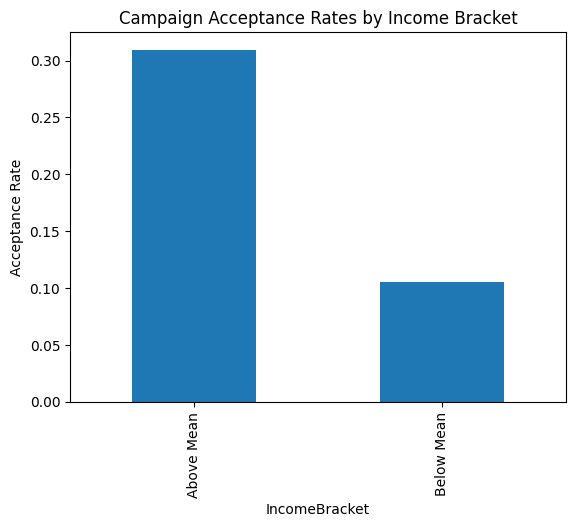

In [25]:
acceptance_rates = df.groupby('IncomeBracket')['EverAcceptedCampaign'].mean()

# Create a bar chart to visualize the acceptance rates
acceptance_rates.plot(kind='bar')
plt.title('Campaign Acceptance Rates by Income Bracket')
plt.ylabel('Acceptance Rate')
plt.show()

Do Higher Income People Spend More?

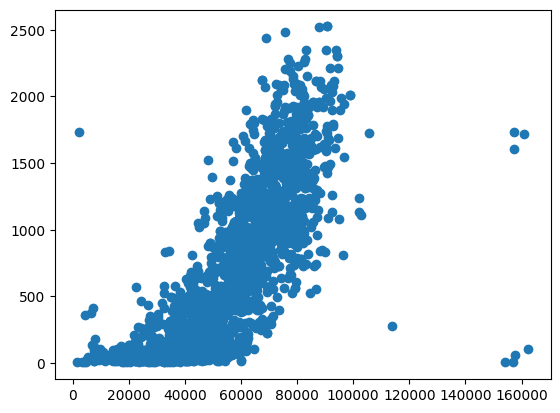

In [26]:
plt.scatter(df["Income"], df["Spending"])

#Insights:
1.Positive Correlation Between Income and Spending:

The scatter plot shows a positive correlation between income and spending. As income increases, spending generally increases as well. This trend indicates that individuals with higher incomes tend to spend more, which is a typical economic behavior.

2.Variance in Spending for Similar Income Levels:

Although there is a clear positive trend, there is also significant variance in spending among individuals with similar income levels. For example, at an income level of around $60,000, spending can range widely, suggesting that factors other than income also play a role in determining spending behavior.
Potential Outliers:

There are a few data points that appear to be outliers, especially on the higher end of the income scale. These points represent individuals with exceptionally high incomes and spending levels, which may not be representative of the general population.

#Recommendations:
1.Segmentation of Customer Base:Given the variance in spending among similar income levels, consider segmenting customers not just by income but also by other factors such as lifestyle, family size, or financial obligations. This will allow for more targeted marketing strategies that better align with different spending behaviors.

2.Target High-Income, High-Spending Individuals:The high-income, high-spending individuals identified in the scatter plot could be targeted with premium products or services. These individuals may be more receptive to luxury items, exclusive offers, or personalized services.

3.Analyze Outliers Separately:The outliers in the data should be analyzed separately to understand what drives their exceptional income and spending patterns. This could reveal unique customer segments or opportunities for specialized products or services.

Do Couples Spend More or Less Money on Wine Than People Living Alone?

<Axes: xlabel='Marital_Situation', ylabel='MntWines'>

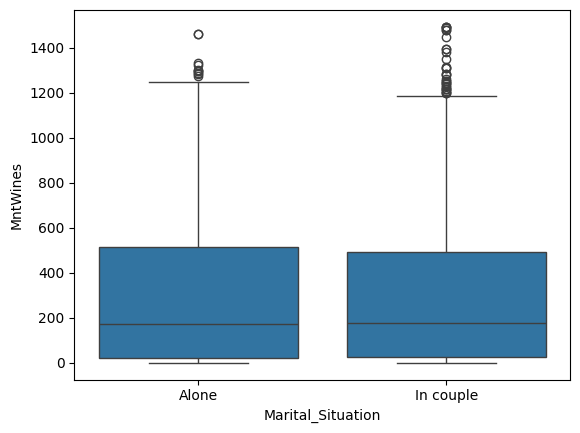

In [27]:
sns.boxplot(x='Marital_Situation', y='MntWines', data=df)

In [28]:
Alone = df[df["Marital_Situation"]=="Alone"]["MntWines"]
Couple = df[df["Marital_Situation"]=="In couple"]["MntWines"]

In [29]:
f_stats, p_value = stats.f_oneway(Alone, Couple)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 0.07356354253693509
p_value: 0.7862422428080872


In [30]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


In [31]:
# H0: Two means are same
t_stat, p_value = stats.ttest_ind(Alone, Couple)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the Money spent on wine are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the Money spent on wine are statistically different from each other.')

p_value: 0.7862422428083654
Fail to reject H0
This means that we do not have enough evidence to conclude that the Money spent on wine are statistically different from each other.
